In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# EDA
train = pd.read_csv("/kaggle/input/titanic/train.csv")
#train.head
train.info
# train.shape
# train.isnull().sum()
# train['Embarked'].value_counts()
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 passengers died, and 342 passengers survived. Of those survivng passengers, what characteristics did they have that may have contributed to their survival? 

In [3]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

64% of the passengers are male, and 35% of the passengers are female. Because there are more male passengers, it can be mistakenly concluded that being male came with a higher chance of surviving/not surviving. We wouldn't necessarily know if the same could be said for female passengers, as there isn't an equal amount of them and therefore their results to compare to males, and vice-versa.

In [4]:
my_agg=(train
 .groupby(['Sex','Survived'])
 .agg(
     fates=pd.NamedAgg('Survived', 'count')))
print(my_agg)

                 fates
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109


More females survived than died in their group, and more males died than survived in their group. What other factors might have played into this?

In [5]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

This shows me what age most of the population is around. It looks as if most of the passengers (75% of them) are age 38 and below.

In [6]:
mybins = pd.IntervalIndex.from_tuples([(0,10),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80)])

In [7]:
train.groupby(['Sex', 
               'Survived', 
               pd.cut(x=train['Age'],
                      bins=mybins)
              ])\
      .size()\
      .unstack()

Age              (0, 10]  (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  \
Sex    Survived                                                              
female 0              12        12        20         9        10         1   
       1              19        34        61        46        21        13   
male   0              14        59       126        77        43        24   
       1              19        10        23        23        12         4   

Age              (60, 70]  (70, 80]  
Sex    Survived                      
female 0                0         0  
       1                3         0  
male   0               13         4  
       1                1         1

Because there isn't an even number of each age to properly determine whether age played a huge factor into surviving or not, I'm putting them into buckets based on their quantiles:

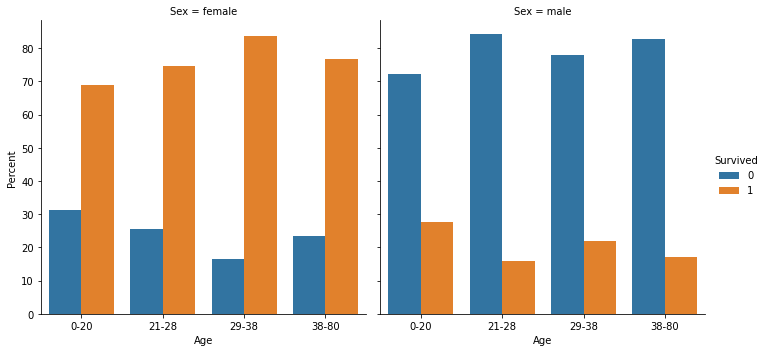

In [8]:
df2=train.groupby(['Sex',
              pd.cut(x=train['Age'],
                      bins=train['Age'].quantile([0,.25,.5,.75,1]),
                      labels=['0-20','21-28','29-38','38-80'])
              ],\
             )['Survived']\
    .value_counts(normalize=True)\
    .mul(100)\
    .rename('Percent')\
    .reset_index(level=1)\
    .reset_index(level=1)\
    .reset_index(level=0)\
    .pipe((sns.catplot,'data'), x='Age', y='Percent', hue='Survived', col='Sex', kind='bar')